# Test results saved in tensorboard

## Simple and Fast CNN For Vision
### Projet AMAL
#### Aylin SOYKOK, Sarah ENG, Simay CELIK

In [42]:
import os
import pandas as pd

base_dir = "results/accuracy/"  

model_files = {
    "Baseline_CNN": "Baseline-CNN-Small.csv",
    "Baseline_ViT": "Baseline-ViT.csv",
    "ConvNeXT": "convnext_cifar10.csv",
    "SFCNN-B_no_exp": "sfcnn_base_cifar10_noexpansion.csv",
    "SFCNN-P_no_exp": "sfcnn_pico_cifar10_noexpansion.csv",
    "SFCNN-P": "sfcnn_pico_cifar10.csv",
    "SFCNN-T": "sfcnn_tiny_cifar10.csv",
    "SFCNN-T_no_exp": "sfcnn_tiny_cifar10_noexpansion.csv"
}


def get_accuracy_data(type="train"):
    accuracy_data = []

    for model_name, file_path in model_files.items():
        file_path = os.path.join(base_dir, type, file_path)
        #print(f"Reading file: {file_path}")

        if os.path.exists(file_path):
            df = pd.read_csv(file_path)

            df.columns = ["Wall time", "Step", "Accuracy"]

            df["Model"] = model_name
            df["Mode"] = type

            accuracy_data.append(df)
        else:
            print(f"File not found: {file_path}")

    accuracy_df = pd.concat(accuracy_data, ignore_index=True)

    accuracy_df = accuracy_df[["Model", "Mode", "Step", "Accuracy", "Wall time"]]

    print(accuracy_df.head())

    accuracy_df.to_csv("results/plots/combined_accuracy_"+type+".csv", index=False)
    return accuracy_df

res = get_accuracy_data("train")
type = "validation"
val_acc = get_accuracy_data(type)
type = "train"
train_acc = get_accuracy_data(type)
train_acc

          Model   Mode  Step   Accuracy     Wall time
0  Baseline_CNN  train     0  38.063999  1.738282e+09
1  Baseline_CNN  train     1  47.882000  1.738282e+09
2  Baseline_CNN  train     2  54.032001  1.738282e+09
3  Baseline_CNN  train     3  58.804001  1.738282e+09
4  Baseline_CNN  train     4  62.268002  1.738282e+09
          Model        Mode  Step   Accuracy     Wall time
0  Baseline_CNN  validation     0  47.970001  1.738282e+09
1  Baseline_CNN  validation     1  55.459999  1.738282e+09
2  Baseline_CNN  validation     2  62.049999  1.738282e+09
3  Baseline_CNN  validation     3  65.709999  1.738282e+09
4  Baseline_CNN  validation     4  66.379997  1.738282e+09
          Model   Mode  Step   Accuracy     Wall time
0  Baseline_CNN  train     0  38.063999  1.738282e+09
1  Baseline_CNN  train     1  47.882000  1.738282e+09
2  Baseline_CNN  train     2  54.032001  1.738282e+09
3  Baseline_CNN  train     3  58.804001  1.738282e+09
4  Baseline_CNN  train     4  62.268002  1.738282e+0

,Model,Mode,Step,Accuracy,Wall time
0,Baseline_CNN,train,0,38.063999,1.738282e+09
1,Baseline_CNN,train,1,47.882000,1.738282e+09
2,Baseline_CNN,train,2,54.032001,1.738282e+09
3,Baseline_CNN,train,3,58.804001,1.738282e+09
4,Baseline_CNN,train,4,62.268002,1.738282e+09
...,...,...,...,...,...
1388,SFCNN-T_no_exp,train,195,99.632004,1.739039e+09
1389,SFCNN-T_no_exp,train,196,99.627998,1.739039e+09
1390,SFCNN-T_no_exp,train,197,99.653999,1.739039e+09
1391,SFCNN-T_no_exp,train,198,99.610001,1.739039e+09


In [43]:
val_acc[val_acc["Model"] == "SFCNN-B_no_exp"].tail()

,Model,Mode,Step,Accuracy,Wall time
563,SFCNN-B_no_exp,validation,52,10.0,1.739045e+09
564,SFCNN-B_no_exp,validation,53,10.0,1.739045e+09
565,SFCNN-B_no_exp,validation,54,10.0,1.739045e+09
566,SFCNN-B_no_exp,validation,55,10.0,1.739045e+09
567,SFCNN-B_no_exp,validation,56,10.0,1.739045e+09


In [44]:
missing_steps = []
for i in range(57, 201):
    if i not in val_acc[val_acc["Model"] == "SFCNN-B_no_exp"]["Step"].values:
        missing_steps.append({"Model": "SFCNN-B_no_exp", "Mode": "validation", "Step": i, "Accuracy": 10})

missing_steps_df = pd.DataFrame(missing_steps)
val_acc = pd.concat([val_acc, missing_steps_df], ignore_index=True)
train_acc = pd.concat([train_acc, missing_steps_df], ignore_index=True)

print(train_acc[train_acc['Model'] == 'SFCNN-B_no_exp'].tail())
print(val_acc[val_acc['Model'] == 'SFCNN-B_no_exp'].tail())

               Model        Mode  Step  Accuracy  Wall time
1532  SFCNN-B_no_exp  validation   196      10.0        NaN
1533  SFCNN-B_no_exp  validation   197      10.0        NaN
1534  SFCNN-B_no_exp  validation   198      10.0        NaN
1535  SFCNN-B_no_exp  validation   199      10.0        NaN
1536  SFCNN-B_no_exp  validation   200      10.0        NaN
               Model        Mode  Step  Accuracy  Wall time
1535  SFCNN-B_no_exp  validation   196      10.0        NaN
1536  SFCNN-B_no_exp  validation   197      10.0        NaN
1537  SFCNN-B_no_exp  validation   198      10.0        NaN
1538  SFCNN-B_no_exp  validation   199      10.0        NaN
1539  SFCNN-B_no_exp  validation   200      10.0        NaN


In [59]:
#fixing colors for consistency between visualizations
colors = {
    "Baseline_CNN": "blue",
    "Baseline_ViT": "green",
    "ConvNeXT": "red",
    "SFCNN-B_no_exp": "cyan",
    "SFCNN-P_no_exp": "yellow",
    "SFCNN-P": "orange",
    "SFCNN-T": "purple",
    "SFCNN-T_no_exp": "hotpink"
}


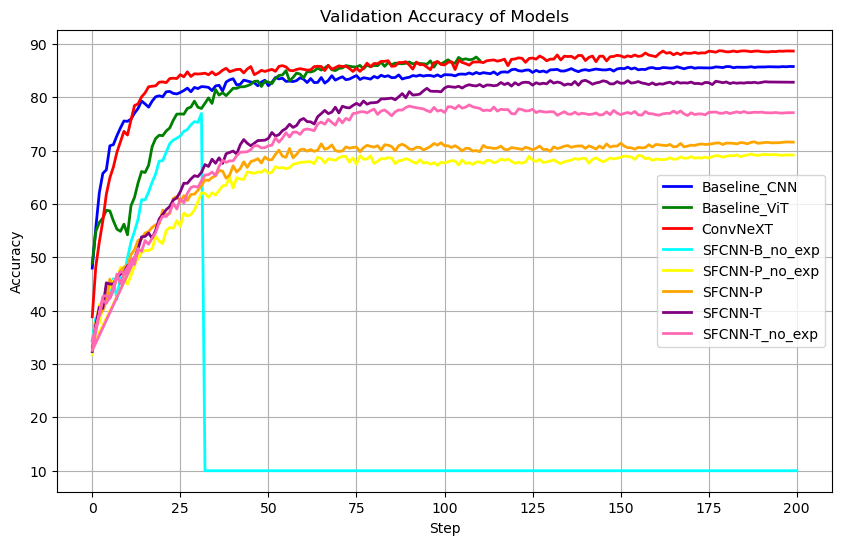

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for model in val_acc['Model'].unique():
    model_data = val_acc[val_acc['Model'] == model]
    plt.plot(model_data['Step'], model_data['Accuracy'], label=model, color=colors[model], linewidth=2)

plt.title('Validation Accuracy of Models')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

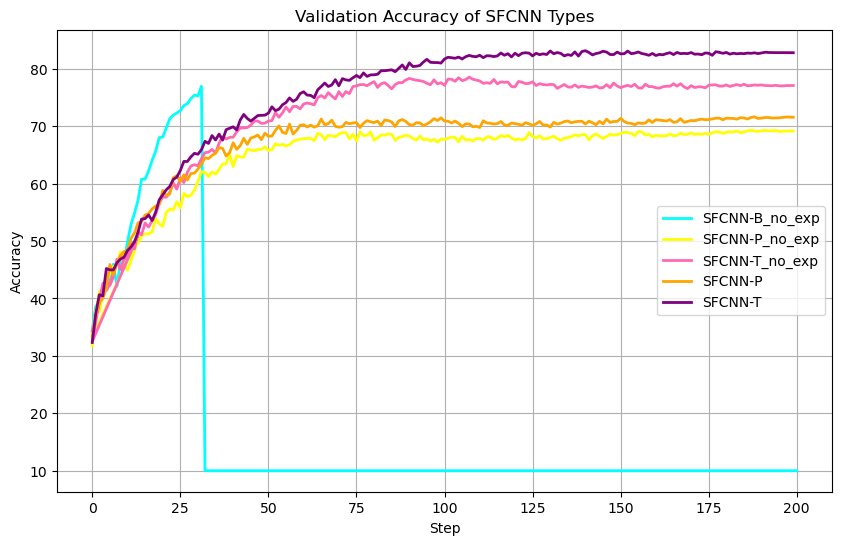

In [65]:
models = ["SFCNN-B_no_exp","SFCNN-P_no_exp","SFCNN-T_no_exp","SFCNN-P","SFCNN-T"]

plt.figure(figsize=(10, 6))
for model in models:
    model_data = val_acc[val_acc['Model'] == model]
    plt.plot(model_data['Step'], model_data['Accuracy'], label=model, color=colors[model], linewidth=2)

plt.title('Validation Accuracy of SFCNN Types')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
    

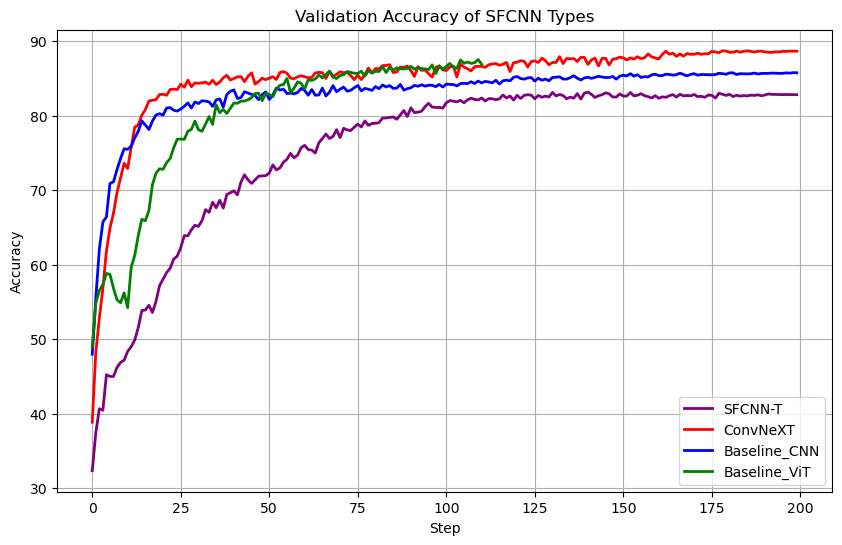

In [66]:
models = ["SFCNN-T","ConvNeXT","Baseline_CNN","Baseline_ViT"]
plt.figure(figsize=(10, 6))
for model in models:
    model_data = val_acc[val_acc['Model'] == model]
    plt.plot(model_data['Step'], model_data['Accuracy'], label=model, color=colors[model], linewidth=2)

plt.title('Validation Accuracy of SFCNN Types')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)